## Car prediction solution Notebook

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1['train'] = 1
df2['train'] = 0

In [4]:
df1.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,train
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,1
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,1
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1


In [5]:
y = df1.iloc[:,1].values

In [6]:
y

array([13328, 16621,  8467, ..., 26108,  5331,   470], dtype=int64)

In [7]:
df2.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,train
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,0
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,0
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,0
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,0
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN,0


In [8]:
df = pd.concat([df1,df2])

In [9]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,train
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,1
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,1
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4.0,Manual,Front,04-May,Left wheel,Blue,6,0
8241,45682346,NaN,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,6,0
8242,45649860,NaN,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0,0
8243,45809706,NaN,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4.0,Automatic,Front,04-May,Left wheel,Green,4,0


In [10]:
df.shape

(27482, 19)

In [11]:
df.head(20)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,train
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,1
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,1
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1
5,45802912,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,1
6,45656768,1803.0,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12,1
7,45816158,549.0,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12,1
8,45641395,1098.0,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12,1
9,45756839,26657.0,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1


### Data cleaning and Feature engineering

In [12]:
df['Mileage']

0       186005 km
1       192000 km
2       200000 km
3       168966 km
4        91901 km
          ...    
8240    164000 km
8241    156000 km
8242    102907 km
8243      3000 km
8244    321269 km
Name: Mileage, Length: 27482, dtype: object

In [13]:
df['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973, 1966,
       1961, 1979, 1956, 1970], dtype=int64)

In [14]:
df['prodafter2015'] = df['Prod. year']>2015

In [15]:
df['prodafter2015']

0       False
1       False
2       False
3       False
4       False
        ...  
8240    False
8241    False
8242    False
8243     True
8244    False
Name: prodafter2015, Length: 27482, dtype: bool

In [16]:
df['prodafter2015'] = df['prodafter2015'].astype(int)

In [17]:
df['prodafter2015']

0       0
1       0
2       0
3       0
4       0
       ..
8240    0
8241    0
8242    0
8243    1
8244    0
Name: prodafter2015, Length: 27482, dtype: int32

In [18]:
df['prodafter2010'] = (df['Prod. year']<2015) & (df['Prod. year']>2010)

In [19]:
df['prodafter2010']

0       False
1        True
2       False
3        True
4        True
        ...  
8240    False
8241     True
8242    False
8243    False
8244     True
Name: prodafter2010, Length: 27482, dtype: bool

In [20]:
df['prodafter2010'] = df['prodafter2010'].astype(int)

In [21]:
df['prodafter2010']

0       0
1       1
2       0
3       1
4       1
       ..
8240    0
8241    1
8242    0
8243    0
8244    1
Name: prodafter2010, Length: 27482, dtype: int32

In [22]:
df['prodafter2000'] = (df['Prod. year']<2010) & (df['Prod. year']>2000)

In [23]:
df['prodafter2000']

0       False
1       False
2        True
3       False
4       False
        ...  
8240     True
8241    False
8242    False
8243    False
8244    False
Name: prodafter2000, Length: 27482, dtype: bool

In [24]:
df['prodafter2000'] = df['prodafter2000'].astype(int)

In [25]:
df['prodafter2000']

0       0
1       0
2       1
3       0
4       0
       ..
8240    1
8241    0
8242    0
8243    0
8244    0
Name: prodafter2000, Length: 27482, dtype: int32

In [26]:
df['prodbefore2000'] = df['Prod. year']<2000

In [27]:
df['prodbefore2000']

0       False
1       False
2       False
3       False
4       False
        ...  
8240    False
8241    False
8242    False
8243    False
8244    False
Name: prodbefore2000, Length: 27482, dtype: bool

In [28]:
df['prodbefore2000'] = df['prodbefore2000'].astype(int)

In [29]:
df['prodbefore2000']

0       0
1       0
2       0
3       0
4       0
       ..
8240    0
8241    0
8242    0
8243    0
8244    0
Name: prodbefore2000, Length: 27482, dtype: int32

In [30]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Drive wheels,Doors,Wheel,Color,Airbags,train,prodafter2015,prodafter2010,prodafter2000,prodbefore2000
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,4x4,04-May,Left wheel,Silver,12,1,0,0,0,0
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,...,4x4,04-May,Left wheel,Black,8,1,0,1,0,0
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,Front,04-May,Right-hand drive,Black,2,1,0,0,1,0
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,4x4,04-May,Left wheel,White,0,1,0,1,0,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,Front,04-May,Left wheel,Silver,4,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,...,Front,04-May,Left wheel,Blue,6,0,0,0,1,0
8241,45682346,NaN,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,...,Front,04-May,Left wheel,Black,6,0,0,1,0,0
8242,45649860,NaN,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,...,4x4,04-May,Left wheel,Black,0,0,0,0,0,0
8243,45809706,NaN,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,...,Front,04-May,Left wheel,Green,4,0,1,0,0,0


In [31]:
df['Mileage'] = df['Mileage'].str.replace('km', '').astype(int)

In [32]:
df['Mileage']

0       186005
1       192000
2       200000
3       168966
4        91901
         ...  
8240    164000
8241    156000
8242    102907
8243      3000
8244    321269
Name: Mileage, Length: 27482, dtype: int32

In [33]:
df['turbo'] = df['Engine volume'].str.contains("Turbo", case=False)

In [34]:
df['turbo']

0       False
1       False
2       False
3       False
4       False
        ...  
8240    False
8241     True
8242    False
8243    False
8244    False
Name: turbo, Length: 27482, dtype: bool

In [35]:
df['turbo'] = df['turbo'].astype(int)

In [36]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '').astype(float)

In [37]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Doors,Wheel,Color,Airbags,train,prodafter2015,prodafter2010,prodafter2000,prodbefore2000,turbo
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,04-May,Left wheel,Silver,12,1,0,0,0,0,0
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,...,04-May,Left wheel,Black,8,1,0,1,0,0,0
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,04-May,Right-hand drive,Black,2,1,0,0,1,0,0
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,04-May,Left wheel,White,0,1,0,1,0,0,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,04-May,Left wheel,Silver,4,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,...,04-May,Left wheel,Blue,6,0,0,0,1,0,0
8241,45682346,NaN,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8,...,04-May,Left wheel,Black,6,0,0,1,0,0,1
8242,45649860,NaN,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,...,04-May,Left wheel,Black,0,0,0,0,0,0,0
8243,45809706,NaN,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,...,04-May,Left wheel,Green,4,0,1,0,0,0,0


In [38]:
df['Leather interior'] = df['Leather interior'].str.replace('Yes', '1').astype(str)
df['Leather interior'] = df['Leather interior'].str.replace('No', '0').astype(str)

In [39]:
df['Leather interior'] = df['Leather interior'].astype(int)

In [40]:
df['Leather interior']

0       1
1       0
2       0
3       1
4       1
       ..
8240    0
8241    1
8242    1
8243    1
8244    1
Name: Leather interior, Length: 27482, dtype: int32

In [41]:
df['Engine volume']

0       3.5
1       3.0
2       1.3
3       2.5
4       1.3
       ... 
8240    1.6
8241    2.8
8242    4.6
8243    1.5
8244    1.3
Name: Engine volume, Length: 27482, dtype: float64

In [42]:
df['EV3'] = df['Engine volume']>=3

In [43]:
df['EV3'] = df['EV3'].astype(int)

In [44]:
df['EV3'].value_counts()

0    21631
1     5851
Name: EV3, dtype: int64

In [45]:
df['EV2'] = (df['Engine volume']<3) & (df['Engine volume']>=2)

In [46]:
df['EV2']

0       False
1       False
2       False
3        True
4       False
        ...  
8240    False
8241     True
8242    False
8243    False
8244    False
Name: EV2, Length: 27482, dtype: bool

In [47]:
df['EV2'] = df['EV2'].astype(int)

In [48]:
df['EV2']

0       0
1       0
2       0
3       1
4       0
       ..
8240    0
8241    1
8242    0
8243    0
8244    0
Name: EV2, Length: 27482, dtype: int32

In [49]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Color,Airbags,train,prodafter2015,prodafter2010,prodafter2000,prodbefore2000,turbo,EV3,EV2
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,...,Silver,12,1,0,0,0,0,0,1,0
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,...,Black,8,1,0,1,0,0,0,1,0
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,...,Black,2,1,0,0,1,0,0,0,0
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,...,White,0,1,0,1,0,0,0,0,1
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,...,Silver,4,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357,FIAT,Stilo,2004,Universal,0,Petrol,1.6,...,Blue,6,0,0,0,1,0,0,0,0
8241,45682346,NaN,-,BMW,528 F10,2012,Sedan,1,Petrol,2.8,...,Black,6,0,0,1,0,0,1,0,1
8242,45649860,NaN,1646,LEXUS,GX 460,2015,Jeep,1,Petrol,4.6,...,Black,0,0,0,0,0,0,0,1,0
8243,45809706,NaN,784,TOYOTA,Aqua,2017,Hatchback,1,Petrol,1.5,...,Green,4,0,1,0,0,0,0,0,0


In [50]:
df['EV2T'] = (df['EV2'] == 1) & (df['turbo'] == 1)

In [51]:
df['EV2T'] 

0       False
1       False
2       False
3       False
4       False
        ...  
8240    False
8241     True
8242    False
8243    False
8244    False
Name: EV2T, Length: 27482, dtype: bool

In [52]:
df['EV2T'] = df['EV2T'].astype(int)

In [53]:
df['EV2T'].value_counts()

0    26237
1     1245
Name: EV2T, dtype: int64

In [54]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Airbags,train,prodafter2015,prodafter2010,prodafter2000,prodbefore2000,turbo,EV3,EV2,EV2T
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,...,12,1,0,0,0,0,0,1,0,0
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,...,8,1,0,1,0,0,0,1,0,0
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,...,2,1,0,0,1,0,0,0,0,0
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,...,0,1,0,1,0,0,0,0,1,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,...,4,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357,FIAT,Stilo,2004,Universal,0,Petrol,1.6,...,6,0,0,0,1,0,0,0,0,0
8241,45682346,NaN,-,BMW,528 F10,2012,Sedan,1,Petrol,2.8,...,6,0,0,1,0,0,1,0,1,1
8242,45649860,NaN,1646,LEXUS,GX 460,2015,Jeep,1,Petrol,4.6,...,0,0,0,0,0,0,0,1,0,0
8243,45809706,NaN,784,TOYOTA,Aqua,2017,Hatchback,1,Petrol,1.5,...,4,0,1,0,0,0,0,0,0,0


In [55]:
df['EV3T'] = (df['EV3'] == 1) & (df['turbo'] == 1)

In [56]:
df['EV3T'] 

0       False
1       False
2       False
3       False
4       False
        ...  
8240    False
8241    False
8242    False
8243    False
8244    False
Name: EV3T, Length: 27482, dtype: bool

In [57]:
df['EV3T'] = df['EV3T'].astype(int) 

In [58]:
df['EV3T'].value_counts() 

0    26888
1      594
Name: EV3T, dtype: int64

In [59]:
df['M>0.1M'] = df['Mileage']>100000

In [60]:
df['M>0.1M']

0        True
1        True
2        True
3        True
4       False
        ...  
8240     True
8241     True
8242     True
8243    False
8244     True
Name: M>0.1M, Length: 27482, dtype: bool

In [61]:
df['M>0.1M'] = df['M>0.1M'].astype(int)

In [62]:
df['M>0.1M'].value_counts()

1    17303
0    10179
Name: M>0.1M, dtype: int64

In [63]:
df['M<10T'] = df['Mileage']<10000

In [64]:
df['M<10T']

0       False
1       False
2       False
3       False
4       False
        ...  
8240    False
8241    False
8242    False
8243     True
8244    False
Name: M<10T, Length: 27482, dtype: bool

In [65]:
df['M<10T'] = df['M<10T'].astype(int)

In [66]:
df['M<10T']

0       0
1       0
2       0
3       0
4       0
       ..
8240    0
8241    0
8242    0
8243    1
8244    0
Name: M<10T, Length: 27482, dtype: int32

In [67]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,prodafter2010,prodafter2000,prodbefore2000,turbo,EV3,EV2,EV2T,EV3T,M>0.1M,M<10T
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,...,0,0,0,0,1,0,0,0,1,0
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,...,1,0,0,0,1,0,0,0,1,0
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,...,0,1,0,0,0,0,0,0,1,0
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,...,1,0,0,0,0,1,0,0,1,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357,FIAT,Stilo,2004,Universal,0,Petrol,1.6,...,0,1,0,0,0,0,0,0,1,0
8241,45682346,NaN,-,BMW,528 F10,2012,Sedan,1,Petrol,2.8,...,1,0,0,1,0,1,1,0,1,0
8242,45649860,NaN,1646,LEXUS,GX 460,2015,Jeep,1,Petrol,4.6,...,0,0,0,0,1,0,0,0,1,0
8243,45809706,NaN,784,TOYOTA,Aqua,2017,Hatchback,1,Petrol,1.5,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df['Levy'] = df['Levy'].str.replace('-', '0').astype(str)

In [69]:
df['Levy'] = df['Levy'].astype(int)

#### Determining correlation between price and other variables

In [70]:
corr = df.corr()

In [71]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(['Price'], ascending=False, inplace=True)
corr.Price

Find most important features relative to target


Price               1.000000
EV3T                0.027385
prodafter2015       0.026548
prodbefore2000      0.018597
turbo               0.017379
Prod. year          0.012982
Engine volume       0.008753
Cylinders           0.007518
EV2T                0.006748
EV3                 0.005766
Leather interior    0.000754
EV2                -0.000351
ID                 -0.000844
Mileage            -0.001758
Levy               -0.003701
M<10T              -0.003747
prodafter2010      -0.010625
Airbags            -0.012824
prodafter2000      -0.018270
M>0.1M             -0.030042
train                    NaN
Name: Price, dtype: float64

<AxesSubplot:>

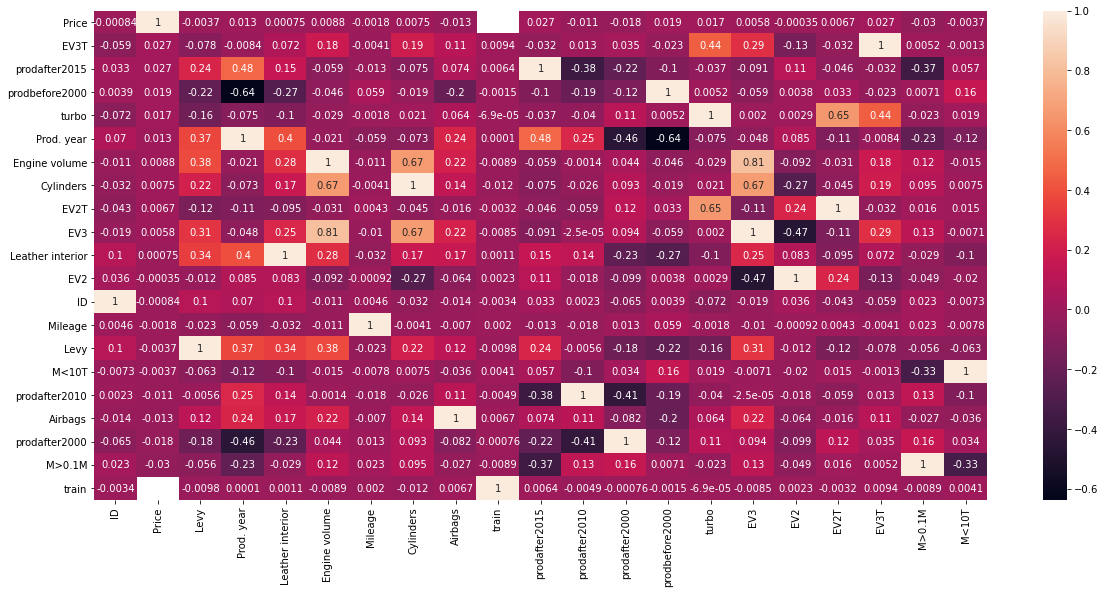

In [72]:
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

In [73]:
df['Color'].value_counts()

Black            7196
White            6392
Silver           5422
Grey             3400
Blue             2011
Red               893
Green             463
Orange            358
Brown             270
Carnelian red     266
Golden            207
Beige             198
Sky blue          177
Yellow            145
Purple             53
Pink               31
Name: Color, dtype: int64

In [74]:
df['Model'].value_counts()

Sonata             1557
Prius              1531
Camry              1328
Elantra            1300
E 350               800
                   ... 
A4 premium            1
Optima hybid          1
C 200 7G-TRONIC       1
Outback 2007          1
Passat 2.0 tfsi       1
Name: Model, Length: 1981, dtype: int64

#### Label encoding

In [75]:
label_encoder = preprocessing.LabelEncoder()
df['Model'] = label_encoder.fit_transform(df['Model'])

In [76]:
df['Color'] = label_encoder.fit_transform(df['Color'])

In [77]:
df['Fuel type'].value_counts()

Petrol            14492
Diesel             5773
Hybrid             5089
LPG                1307
CNG                 701
Plug-in Hybrid      118
Hydrogen              2
Name: Fuel type, dtype: int64

#### Filling Missing values 

In [78]:
p = df['Levy'][df['Fuel type'] == 'Petrol']
p

1       1018
2          0
4        446
7        751
9          0
        ... 
8239     645
8240    1357
8241       0
8242    1646
8243     784
Name: Levy, Length: 14492, dtype: int32

In [79]:
p.mean()

648.896080596191

In [80]:
d = df['Levy'][df['Fuel type'] == 'Diesel']
d

5        891
10      1053
14       891
23         0
25         0
        ... 
8219     919
8221     640
8235    1053
8236     891
8237     891
Name: Levy, Length: 5773, dtype: int32

In [81]:
d.mean()

758.2622553265201

In [82]:
h = df['Levy'][df['Fuel type'] == 'Hybrid']
h

0       1399
3        862
6        761
8        394
13      1055
        ... 
8206     831
8209     518
8227     490
8234     247
8244     448
Name: Levy, Length: 5089, dtype: int32

In [83]:
h.mean()

567.7840440165062

In [84]:
lpg = df['Levy'][df['Fuel type'] == 'LPG']
lpg

65      765
114       0
126     639
141     639
151     891
       ... 
8158    891
8164    891
8173    639
8187    639
8230    765
Name: Levy, Length: 1307, dtype: int32

In [85]:
lpg.mean()

572.557000765111

In [86]:
cng = df['Levy'][df['Fuel type'] == 'CNG']
cng

11      0
12      0
32      0
110     0
182     0
       ..
8018    0
8047    0
8107    0
8185    0
8212    0
Name: Levy, Length: 701, dtype: int32

In [87]:
cng.mean()

57.86875891583452

In [88]:
pih = df['Levy'][df['Fuel type'] == 'Plug-in Hybrid']
pih

21      586
661     431
736     259
758     333
1430    475
       ... 
7611    475
7685    382
7789      0
8104      0
8152    259
Name: Levy, Length: 118, dtype: int32

In [89]:
pih.mean()

198.66101694915255

In [90]:
h2 = df['Levy'][df['Fuel type'] == 'Hydrogen']
h2

12900      0
4843     238
Name: Levy, dtype: int32

In [91]:
h2.mean()

119.0

In [92]:
df['Levy'][(df['Fuel type'] == 'Hydrogen') & (df['Levy'] == 0)] = h2.max()

<ipython-input-92-1025bc563122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Levy'][(df['Fuel type'] == 'Hydrogen') & (df['Levy'] == 0)] = h2.max()


In [93]:
df['Levy'][(df['Fuel type'] == 'Hydrogen') & (df['Levy'] == 238)]

12900    238
4843     238
Name: Levy, dtype: int32

In [94]:
df['Levy'][(df['Fuel type'] == 'Petrol') & (df['Levy'] == 0)] = p.mean()

<ipython-input-94-b0224aebd846>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Levy'][(df['Fuel type'] == 'Petrol') & (df['Levy'] == 0)] = p.mean()


In [95]:
df['Levy'][(df['Fuel type'] == 'Hybrid') & (df['Levy'] == 0)] = h.mean()

In [96]:
df['Levy'][(df['Fuel type'] == 'Diesel') & (df['Levy'] == 0)] = d.mean()

In [97]:
df['Levy'][(df['Fuel type'] == 'LPG') & (df['Levy'] == 0)] = lpg.mean()

In [98]:
df['Levy'][(df['Fuel type'] == 'CNG') & (df['Levy'] == 0)] = cng.mean()

In [99]:
df['Levy'][(df['Fuel type'] == 'Plug-in Hybrid') & (df['Levy'] == 0)] = pih.mean()

In [100]:
df['Levy']

0       1399.000000
1       1018.000000
2        648.896081
3        862.000000
4        446.000000
           ...     
8240    1357.000000
8241     648.896081
8242    1646.000000
8243     784.000000
8244     448.000000
Name: Levy, Length: 27482, dtype: float64

In [101]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,prodafter2010,prodafter2000,prodbefore2000,turbo,EV3,EV2,EV2T,EV3T,M>0.1M,M<10T
0,45654403,13328.0,1399.000000,LEXUS,1547,2010,Jeep,1,Hybrid,3.5,...,0,0,0,0,1,0,0,0,1,0
1,44731507,16621.0,1018.000000,CHEVROLET,816,2011,Jeep,0,Petrol,3.0,...,1,0,0,0,1,0,0,0,1,0
2,45774419,8467.0,648.896081,HONDA,849,2006,Hatchback,0,Petrol,1.3,...,0,1,0,0,0,0,0,0,1,0
3,45769185,3607.0,862.000000,FORD,819,2011,Jeep,1,Hybrid,2.5,...,1,0,0,0,0,1,0,0,1,0
4,45809263,11726.0,446.000000,HONDA,849,2014,Hatchback,1,Petrol,1.3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357.000000,FIAT,1720,2004,Universal,0,Petrol,1.6,...,0,1,0,0,0,0,0,0,1,0
8241,45682346,NaN,648.896081,BMW,190,2012,Sedan,1,Petrol,2.8,...,1,0,0,1,0,1,1,0,1,0
8242,45649860,NaN,1646.000000,LEXUS,1006,2015,Jeep,1,Petrol,4.6,...,0,0,0,0,1,0,0,0,1,0
8243,45809706,NaN,784.000000,TOYOTA,322,2017,Hatchback,1,Petrol,1.5,...,0,0,0,0,0,0,0,0,0,1


In [102]:
df['Manufacturer'].value_counts()

HYUNDAI          5358
TOYOTA           5177
MERCEDES-BENZ    2983
FORD             1592
CHEVROLET        1520
                 ... 
LAMBORGHINI         1
PONTIAC             1
LANCIA              1
MG                  1
FOTON               1
Name: Manufacturer, Length: 68, dtype: int64

In [103]:
df['Manufacturer'].value_counts().sort_values(ascending=False).head(20)

HYUNDAI          5358
TOYOTA           5177
MERCEDES-BENZ    2983
FORD             1592
CHEVROLET        1520
BMW              1447
LEXUS            1433
HONDA            1391
NISSAN            944
VOLKSWAGEN        850
SSANGYONG         643
KIA               605
OPEL              587
MITSUBISHI        408
SUBARU            384
AUDI              375
MAZDA             258
JEEP              190
DAEWOO            134
DODGE             128
Name: Manufacturer, dtype: int64

In [104]:
top = [x for x in df['Manufacturer'].value_counts().sort_values(ascending=False).head(68).index]
top

['HYUNDAI',
 'TOYOTA',
 'MERCEDES-BENZ',
 'FORD',
 'CHEVROLET',
 'BMW',
 'LEXUS',
 'HONDA',
 'NISSAN',
 'VOLKSWAGEN',
 'SSANGYONG',
 'KIA',
 'OPEL',
 'MITSUBISHI',
 'SUBARU',
 'AUDI',
 'MAZDA',
 'JEEP',
 'DAEWOO',
 'DODGE',
 'FIAT',
 'SUZUKI',
 'VAZ',
 'MINI',
 'LAND ROVER',
 'PORSCHE',
 'JAGUAR',
 'INFINITI',
 'RENAULT',
 'CHRYSLER',
 'SKODA',
 'ACURA',
 'VOLVO',
 'BUICK',
 'LINCOLN',
 'GMC',
 'PEUGEOT',
 'CADILLAC',
 'GAZ',
 'DAIHATSU',
 'UAZ',
 'CITROEN',
 'SCION',
 'ISUZU',
 'ALFA ROMEO',
 'MASERATI',
 'HUMMER',
 'MERCURY',
 'ROVER',
 'MOSKVICH',
 'ZAZ',
 'სხვა',
 'SAAB',
 'FERRARI',
 'BENTLEY',
 'GREATWALL',
 'SATURN',
 'TESLA',
 'SEAT',
 'ROLLS-ROYCE',
 'ASTON MARTIN',
 'TATA',
 'HAVAL',
 'LAMBORGHINI',
 'PONTIAC',
 'LANCIA',
 'MG',
 'FOTON']

In [105]:
for label in top:
    df[label] = np.where(df['Manufacturer']==label,1,0)
    
df[['Manufacturer'] + top].head(20)

,Manufacturer,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,...,SEAT,ROLLS-ROYCE,ASTON MARTIN,TATA,HAVAL,LAMBORGHINI,PONTIAC,LANCIA,MG,FOTON
0,LEXUS,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEVROLET,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HONDA,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,FORD,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HONDA,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,HYUNDAI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TOYOTA,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,HYUNDAI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,TOYOTA,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LEXUS,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df.drop('Manufacturer', inplace=True, axis=1)

In [107]:
df.head(30)

,ID,Price,Levy,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,SEAT,ROLLS-ROYCE,ASTON MARTIN,TATA,HAVAL,LAMBORGHINI,PONTIAC,LANCIA,MG,FOTON
0,45654403,13328.0,1399.000000,1547,2010,Jeep,1,Hybrid,3.5,186005,...,0,0,0,0,0,0,0,0,0,0
1,44731507,16621.0,1018.000000,816,2011,Jeep,0,Petrol,3.0,192000,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,648.896081,849,2006,Hatchback,0,Petrol,1.3,200000,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862.000000,819,2011,Jeep,1,Hybrid,2.5,168966,...,0,0,0,0,0,0,0,0,0,0
4,45809263,11726.0,446.000000,849,2014,Hatchback,1,Petrol,1.3,91901,...,0,0,0,0,0,0,0,0,0,0
5,45802912,39493.0,891.000000,1623,2016,Jeep,1,Diesel,2.0,160931,...,0,0,0,0,0,0,0,0,0,0
6,45656768,1803.0,761.000000,1436,2010,Hatchback,1,Hybrid,1.8,258909,...,0,0,0,0,0,0,0,0,0,0
7,45816158,549.0,751.000000,1657,2013,Sedan,1,Petrol,2.4,216118,...,0,0,0,0,0,0,0,0,0,0
8,45641395,1098.0,394.000000,538,2014,Sedan,1,Hybrid,2.5,398069,...,0,0,0,0,0,0,0,0,0,0
9,45756839,26657.0,648.896081,1539,2007,Jeep,1,Petrol,3.5,128500,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df['Levy'].mean()

816.0463344249033

#### One hot encoding for categorical variables

In [109]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols
col_list = list(set(cols) - set(num_cols))
col_list

['Drive wheels', 'Gear box type', 'Doors', 'Fuel type', 'Category', 'Wheel']

In [110]:
dfnew = pd.get_dummies(df, columns = ['Drive wheels', 'Wheel', 'Fuel type', 'Gear box type', 'Doors', 'Category'] )


In [111]:
dfnew

,ID,Price,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Color,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,45654403,13328.0,1399.000000,1547,2010,1,3.5,186005,6.0,12,...,0,0,0,1,0,0,0,0,0,0
1,44731507,16621.0,1018.000000,816,2011,0,3.0,192000,6.0,1,...,0,0,0,1,0,0,0,0,0,0
2,45774419,8467.0,648.896081,849,2006,0,1.3,200000,4.0,1,...,0,0,1,0,0,0,0,0,0,0
3,45769185,3607.0,862.000000,819,2011,1,2.5,168966,4.0,14,...,0,0,0,1,0,0,0,0,0,0
4,45809263,11726.0,446.000000,849,2014,1,1.3,91901,4.0,12,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357.000000,1720,2004,0,1.6,164000,4.0,2,...,0,0,0,0,0,0,0,0,0,1
8241,45682346,NaN,648.896081,190,2012,1,2.8,156000,4.0,1,...,0,0,0,0,0,0,0,0,1,0
8242,45649860,NaN,1646.000000,1006,2015,1,4.6,102907,8.0,1,...,0,0,0,1,0,0,0,0,0,0
8243,45809706,NaN,784.000000,322,2017,1,1.5,3000,4.0,6,...,0,0,1,0,0,0,0,0,0,0


In [112]:
df['train']

0       1
1       1
2       1
3       1
4       1
       ..
8240    0
8241    0
8242    0
8243    0
8244    0
Name: train, Length: 27482, dtype: int64

#### splitting train and test data

In [113]:
train_df = dfnew[dfnew['train'] == 1]
test_df = dfnew[dfnew['train'] == 0]
train_df.drop(["train"],axis=1,inplace=True)
test_df.drop(["train"],axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [114]:
train_df

,ID,Price,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Color,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,45654403,13328.0,1399.000000,1547,2010,1,3.5,186005,6.0,12,...,0,0,0,1,0,0,0,0,0,0
1,44731507,16621.0,1018.000000,816,2011,0,3.0,192000,6.0,1,...,0,0,0,1,0,0,0,0,0,0
2,45774419,8467.0,648.896081,849,2006,0,1.3,200000,4.0,1,...,0,0,1,0,0,0,0,0,0,0
3,45769185,3607.0,862.000000,819,2011,1,2.5,168966,4.0,14,...,0,0,0,1,0,0,0,0,0,0
4,45809263,11726.0,446.000000,849,2014,1,1.3,91901,4.0,12,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467.0,57.868759,477,1999,1,2.0,300000,4.0,12,...,1,0,0,0,0,0,0,0,0,0
19233,45778856,15681.0,831.000000,1657,2011,1,2.4,161600,4.0,11,...,0,0,0,0,0,0,0,0,1,0
19234,45804997,26108.0,836.000000,1795,2010,1,2.0,116365,4.0,7,...,0,0,0,1,0,0,0,0,0,0
19235,45793526,5331.0,1288.000000,566,2007,1,2.0,51258,4.0,1,...,0,0,0,1,0,0,0,0,0,0


In [115]:
test_df

,ID,Price,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Color,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,44020629,NaN,758.262255,1022,2012,0,2.0,0,4.0,7,...,0,0,1,0,0,0,0,0,0,0
1,45784798,NaN,648.896081,1657,2012,1,2.4,26000,4.0,7,...,0,0,0,0,0,0,0,0,1,0
2,45800257,NaN,648.896081,1751,2005,0,1.5,168000,4.0,13,...,0,0,0,0,0,0,0,0,1,0
3,45797981,NaN,975.000000,1938,2012,1,3.2,143000,6.0,2,...,0,0,0,1,0,0,0,0,0,0
4,45814303,NaN,648.896081,338,1993,0,1.6,200000,4.0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357.000000,1720,2004,0,1.6,164000,4.0,2,...,0,0,0,0,0,0,0,0,0,1
8241,45682346,NaN,648.896081,190,2012,1,2.8,156000,4.0,1,...,0,0,0,0,0,0,0,0,1,0
8242,45649860,NaN,1646.000000,1006,2015,1,4.6,102907,8.0,1,...,0,0,0,1,0,0,0,0,0,0
8243,45809706,NaN,784.000000,322,2017,1,1.5,3000,4.0,6,...,0,0,1,0,0,0,0,0,0,0


In [116]:
train_df.drop('Price',inplace=True,axis=1)
train_df.drop('ID',inplace=True,axis=1)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [117]:
train_df

,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Color,Airbags,prodafter2015,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,1399.000000,1547,2010,1,3.5,186005,6.0,12,12,0,...,0,0,0,1,0,0,0,0,0,0
1,1018.000000,816,2011,0,3.0,192000,6.0,1,8,0,...,0,0,0,1,0,0,0,0,0,0
2,648.896081,849,2006,0,1.3,200000,4.0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
3,862.000000,819,2011,1,2.5,168966,4.0,14,0,0,...,0,0,0,1,0,0,0,0,0,0
4,446.000000,849,2014,1,1.3,91901,4.0,12,4,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,57.868759,477,1999,1,2.0,300000,4.0,12,5,0,...,1,0,0,0,0,0,0,0,0,0
19233,831.000000,1657,2011,1,2.4,161600,4.0,11,8,0,...,0,0,0,0,0,0,0,0,1,0
19234,836.000000,1795,2010,1,2.0,116365,4.0,7,4,0,...,0,0,0,1,0,0,0,0,0,0
19235,1288.000000,566,2007,1,2.0,51258,4.0,1,4,0,...,0,0,0,1,0,0,0,0,0,0


In [118]:
test_df

,ID,Price,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Color,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,44020629,NaN,758.262255,1022,2012,0,2.0,0,4.0,7,...,0,0,1,0,0,0,0,0,0,0
1,45784798,NaN,648.896081,1657,2012,1,2.4,26000,4.0,7,...,0,0,0,0,0,0,0,0,1,0
2,45800257,NaN,648.896081,1751,2005,0,1.5,168000,4.0,13,...,0,0,0,0,0,0,0,0,1,0
3,45797981,NaN,975.000000,1938,2012,1,3.2,143000,6.0,2,...,0,0,0,1,0,0,0,0,0,0
4,45814303,NaN,648.896081,338,1993,0,1.6,200000,4.0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357.000000,1720,2004,0,1.6,164000,4.0,2,...,0,0,0,0,0,0,0,0,0,1
8241,45682346,NaN,648.896081,190,2012,1,2.8,156000,4.0,1,...,0,0,0,0,0,0,0,0,1,0
8242,45649860,NaN,1646.000000,1006,2015,1,4.6,102907,8.0,1,...,0,0,0,1,0,0,0,0,0,0
8243,45809706,NaN,784.000000,322,2017,1,1.5,3000,4.0,6,...,0,0,1,0,0,0,0,0,0,0


In [119]:
test_df.drop('Price',inplace=True,axis=1)
test_df.drop('ID',inplace=True,axis=1)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [120]:
test_df

,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Color,Airbags,prodafter2015,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,758.262255,1022,2012,0,2.0,0,4.0,7,10,0,...,0,0,1,0,0,0,0,0,0,0
1,648.896081,1657,2012,1,2.4,26000,4.0,7,10,0,...,0,0,0,0,0,0,0,0,1,0
2,648.896081,1751,2005,0,1.5,168000,4.0,13,8,0,...,0,0,0,0,0,0,0,0,1,0
3,975.000000,1938,2012,1,3.2,143000,6.0,2,12,0,...,0,0,0,1,0,0,0,0,0,0
4,648.896081,338,1993,0,1.6,200000,4.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357.000000,1720,2004,0,1.6,164000,4.0,2,6,0,...,0,0,0,0,0,0,0,0,0,1
8241,648.896081,190,2012,1,2.8,156000,4.0,1,6,0,...,0,0,0,0,0,0,0,0,1,0
8242,1646.000000,1006,2015,1,4.6,102907,8.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8243,784.000000,322,2017,1,1.5,3000,4.0,6,4,1,...,0,0,1,0,0,0,0,0,0,0


In [121]:
X = train_df.iloc[:].values
X_test = test_df.iloc[:].values

In [122]:
X.shape

(19237, 118)

In [123]:
X_test.shape

(8245, 118)

#### Predicting the results using Extratree and random forest algorithm

In [140]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(**params)
ETree.fit(X,y)
predrd = ETree.predict(X_test)

In [141]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(**params)
regressor.fit(X, y)

RandomForestRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=15,
                      n_estimators=1100)

In [142]:
predrd_et

array([20130.95155131, 17876.01224804, 10619.35501252, ...,
       21394.85123499, 36737.55890223,  7427.23653427])

In [143]:
predrd_rf = regressor.predict(X_test)

In [144]:
finalpred = (predrd_et+predrd_rf)/2

array([18811.20623449, 16595.06708116,  7416.96897016, ...,
       24502.89934706, 36139.09741255,  5410.86403399])

In [146]:
dfsub = pd.DataFrame(data= finalpred)

In [147]:
dfsub

,0
0,18811.206234
1,16595.067081
2,7416.968970
3,5780.973637
4,5701.341314
...,...
8240,7583.231480
8241,20294.345718
8242,24502.899347
8243,36139.097413


In [148]:
dfsub['Price'] = dfsub

In [149]:
dfsub.pop(0)

0       18811.206234
1       16595.067081
2        7416.968970
3        5780.973637
4        5701.341314
            ...     
8240     7583.231480
8241    20294.345718
8242    24502.899347
8243    36139.097413
8244     5410.864034
Name: 0, Length: 8245, dtype: float64

In [150]:
dfsub

,Price
0,18811.206234
1,16595.067081
2,7416.968970
3,5780.973637
4,5701.341314
...,...
8240,7583.231480
8241,20294.345718
8242,24502.899347
8243,36139.097413


In [151]:
dfsub.to_csv('my_submission_file Extratree Fe.csv', index=False)